# Database & Analytics Programming CA2 (Data Visualisation)

Dataset - Medicaid Beneficiaries, Inpatient Admissions and Emergency Room Visits by Zip Code: Beginning 2012

In [69]:
#Importing libraries

import pymongo
import numpy as np
import pandas as pd
from pymongo import MongoClient
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [70]:
#establishing the connection
conn = psycopg2.connect(
   database="dap_new", user='postgres', password='@Coolaayush1', host='127.0.0.1', port= '5432'
)
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [71]:
#Execute the query
cursor.execute("SELECT * FROM public.medicare;") 

In [73]:
# cursor.fetchall()
column_names=['_id', 'year', 'zip_code', 'county', 'total_n', 'dual_n', 'nondual_n',
       'child_n', 'adult_n', 'dual_recip_admit', 'dual_admits',
       'nondual_recip_admit', 'nondual_admits', 'recip_admit', 'total_admits',
       'dual_er_recip', 'dual_er_visits', 'nondual_er_recip',
       'nondual_er_visits', 'all_er_recip', 'all_er_visits']

In [74]:
medicare_df=pd.DataFrame(cursor.fetchall(),columns=column_names)
medicare_df

,_id,year,zip_code,county,total_n,dual_n,nondual_n,child_n,adult_n,dual_recip_admit,...,nondual_recip_admit,nondual_admits,recip_admit,total_admits,dual_er_recip,dual_er_visits,nondual_er_recip,nondual_er_visits,all_er_recip,all_er_visits
0,63a22c7e5c3567850d811756,2012,06390,Suffolk ...,4,1,3,1,3,1,...,0,0,1,1,0,0,0,0,0,0
1,63a22c7e5c3567850d811757,2012,10001,New York ...,10704,2478,8226,1065,9639,547,...,1712,4774,2259,5691,605,1391,2594,9013,3199,10404
2,63a22c7e5c3567850d811758,2012,10002,New York ...,58639,10748,47891,13857,44782,1506,...,3632,5298,5138,7268,1173,2083,6571,12674,7744,14757
3,63a22c7e5c3567850d811759,2012,10003,New York ...,4668,1163,3505,598,4070,190,...,595,1630,785,1936,155,328,1002,2810,1157,3138
4,63a22c7e5c3567850d81175a,2012,10004,New York ...,635,268,367,36,599,47,...,92,206,139,276,85,255,134,372,219,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,63a22c7e5c3567850d81300f,2014,14902,Chemung ...,528,146,382,128,400,28,...,27,64,55,101,55,166,97,283,152,449
6330,63a22c7e5c3567850d813010,2014,14903,Chemung ...,1900,343,1557,619,1281,44,...,155,218,199,272,89,247,520,1032,609,1279
6331,63a22c7e5c3567850d813011,2014,14904,Chemung ...,6993,995,5998,2529,4464,159,...,622,831,781,1054,312,871,2219,4951,2531,5822
6332,63a22c7e5c3567850d813012,2014,14905,Chemung ...,1961,287,1674,681,1280,43,...,143,201,186,257,64,171,582,1322,646,1493


In [76]:
medicare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  6334 non-null   object
 1   year                 6334 non-null   object
 2   zip_code             6334 non-null   object
 3   county               6334 non-null   object
 4   total_n              6334 non-null   object
 5   dual_n               6334 non-null   object
 6   nondual_n            6334 non-null   object
 7   child_n              6334 non-null   object
 8   adult_n              6334 non-null   object
 9   dual_recip_admit     6334 non-null   object
 10  dual_admits          6334 non-null   object
 11  nondual_recip_admit  6334 non-null   object
 12  nondual_admits       6334 non-null   object
 13  recip_admit          6334 non-null   object
 14  total_admits         6334 non-null   object
 15  dual_er_recip        6334 non-null   object
 16  dual_e

# Data Visualisation

In [83]:
medicare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  6334 non-null   object
 1   year                 6334 non-null   object
 2   zip_code             6334 non-null   object
 3   county               6334 non-null   object
 4   total_n              6334 non-null   object
 5   dual_n               6334 non-null   object
 6   nondual_n            6334 non-null   object
 7   child_n              6334 non-null   object
 8   adult_n              6334 non-null   object
 9   dual_recip_admit     6334 non-null   object
 10  dual_admits          6334 non-null   object
 11  nondual_recip_admit  6334 non-null   object
 12  nondual_admits       6334 non-null   object
 13  recip_admit          6334 non-null   object
 14  total_admits         6334 non-null   object
 15  dual_er_recip        6334 non-null   object
 16  dual_e

In [84]:
for i in medicare_df:
    try:
        medicare_df[i]=medicare_df[i].astype(int)
    except:
        pass

In [85]:
medicare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  6334 non-null   object
 1   year                 6334 non-null   int64 
 2   zip_code             6334 non-null   int64 
 3   county               6334 non-null   object
 4   total_n              6334 non-null   int64 
 5   dual_n               6334 non-null   int64 
 6   nondual_n            6334 non-null   int64 
 7   child_n              6334 non-null   int64 
 8   adult_n              6334 non-null   int64 
 9   dual_recip_admit     6334 non-null   int64 
 10  dual_admits          6334 non-null   int64 
 11  nondual_recip_admit  6334 non-null   int64 
 12  nondual_admits       6334 non-null   int64 
 13  recip_admit          6334 non-null   int64 
 14  total_admits         6334 non-null   int64 
 15  dual_er_recip        6334 non-null   int64 
 16  dual_e

In [86]:
# Bar chart of States in US vs Beneficiaries
list1=[]
list2=[]
for i in medicare_df["county"].unique():
    list2.append(medicare_df[medicare_df["county"]==i]["total_n"].mean())
    list1.append(i)

In [18]:
df=pd.DataFrame()
df["County"]=list1
df["Total_benificiaries_Avg"]=list2
df=df.sort_values(by="Total_benificiaries_Avg",ascending=False)
df

,County,Total_benificiaries_Avg
3,Bronx,33508.571429
10,Kings,24791.269231
6,Queens,12203.694561
2,Richmond,9569.714286
1,New York,4105.353425
...,...,...
60,Schuyler,349.404762
14,Greene,333.879630
23,Delaware,299.372727
28,Essex,279.902174


Text(0.5, 1.0, 'States in US vs Beneficiaries')

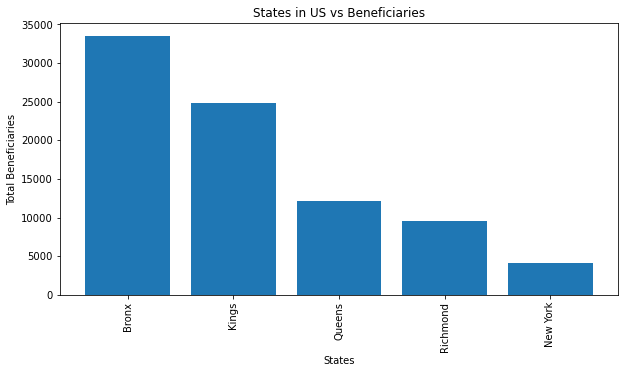

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df["County"][:5], df["Total_benificiaries_Avg"][:5], width=0.8)

plt.xlabel('States')
plt.ylabel('Total Beneficiaries')

plt.xticks(rotation=90)
plt.title('States in US vs Beneficiaries')

In [20]:
# Pie chart of Dual and Non-Dual Eligible vs Year

In [21]:
lst1=[]
lst2=[]
for i in medicare_df["Year"].unique():
    lst2.append(medicare_df[medicare_df["Year"]==i]["Dual Eligible Beneficiaries"].mean())
    lst1.append(i)

In [22]:
lst2

[408.12743699476937, 417.2550875532418, 428.14542020774314]

In [23]:
df1=pd.DataFrame()
df1["Dual Eligible Beneficiaries"] = lst1
df1["Year"] = lst2

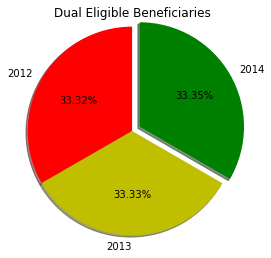

In [65]:
colors = ['r','y','g']
Year = ['2012','2013','2014']
plt.title("Dual Eligible Beneficiaries")
plt.pie(df1["Dual Eligible Beneficiaries"], labels = Year, colors=colors, startangle=90, shadow=True, radius = 1.2, 
          explode = (0,0,0.1), autopct = '%1.2f%%')
#plt.legend()
plt.show()

In [25]:
lst1=[]
lst2=[]
for i in medicare_df["Year"].unique():
    lst2.append(medicare_df[medicare_df["Year"]==i]["Non Dual Beneficiaries"].mean())
    lst1.append(i)

In [26]:
lst1

[2012, 2013, 2014]

In [27]:
lst2

[2375.9191631003328, 2451.1481306199717, 2734.11567516525]

In [28]:
df2=pd.DataFrame()
df2["Non Dual Beneficiaries"] = lst1
df2["Year"] = lst2

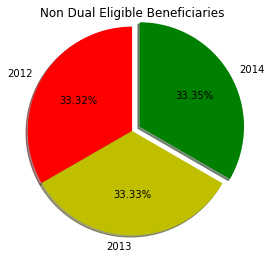

In [67]:
colors = ['r','y','g']
Year = ['2012','2013','2014']
plt.title("Non Dual Eligible Beneficiaries")
plt.pie(df2["Non Dual Beneficiaries"], labels = Year, colors=colors, startangle=90, shadow=True, radius = 1.2, 
       explode = (0,0,0.1), autopct = '%1.2f%%')
#plt.legend()
plt.show()

In [37]:
# Bar chart of States in US vs Dual Beneficiaries ER Visits
list3=[]
list4=[]
for i in medicare_df["County"].unique():
    list4.append(medicare_df[medicare_df["County"]==i]["Dual Beneficiaries ER Visits"].mean())
    list3.append(i)

In [42]:
df3=pd.DataFrame()
df3["County"] = list3
df3["Dual_Beneficiaries_ER_Visits_Avg"] = list4
df3=df3.sort_values(by="Dual_Beneficiaries_ER_Visits_Avg",ascending=False)

In [43]:
df3

,County,Dual_Beneficiaries_ER_Visits_Avg
3,Bronx,1188.883117
10,Kings,713.115385
2,Richmond,449.547619
6,Queens,316.702929
55,Monroe,309.554878
...,...,...
14,Greene,19.814815
45,Tioga,19.738095
50,Wyoming,15.649123
42,Lewis,12.260000


Text(0.5, 1.0, 'States in US vs Dual Beneficiaries ER Visits')

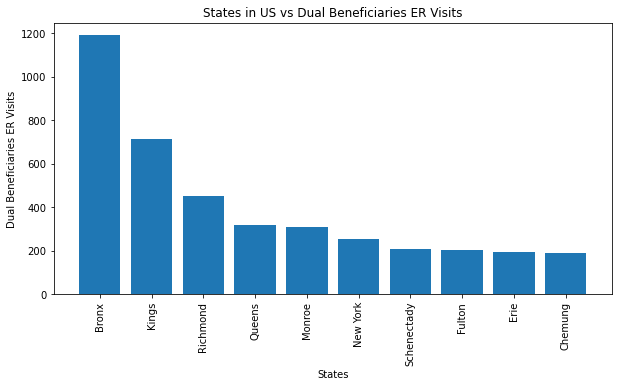

In [48]:
fig1 = plt.figure(figsize = (10, 5))
plt.bar(df3["County"][:10], df3["Dual_Beneficiaries_ER_Visits_Avg"][:10], width=0.8)

plt.xlabel('States')
plt.ylabel('Dual Beneficiaries ER Visits')

plt.xticks(rotation=90)
plt.title('States in US vs Dual Beneficiaries ER Visits')

In [49]:
# Bar chart of States in US vs Non-Dual Beneficiaries ER Visits
list5=[]
list6=[]
for i in medicare_df["County"].unique():
    list5.append(medicare_df[medicare_df["County"]==i]["Non Dual Beneficiaries ER Visits"].mean())
    list6.append(i)

In [58]:
df4=pd.DataFrame()
df4["County"] = list6
df4["Non_Dual_Beneficiaries_ER_Visits_Avg"] = list5
df4=df4.sort_values(by="Non_Dual_Beneficiaries_ER_Visits_Avg",ascending=False)
df4

,County,Non_Dual_Beneficiaries_ER_Visits_Avg
3,Bronx,17325.142857
10,Kings,8550.935897
2,Richmond,4142.880952
6,Queens,4122.849372
1,New York,2004.120548
...,...,...
19,Schoharie,165.350877
50,Wyoming,157.894737
28,Essex,152.782609
14,Greene,121.277778


Text(0.5, 1.0, 'States in US vs Non Dual Beneficiaries ER Visits')

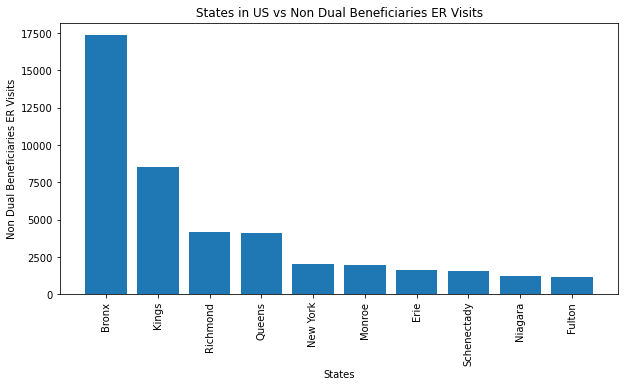

In [59]:
fig2 = plt.figure(figsize = (10, 5))
plt.bar(df4["County"][:10], df4["Non_Dual_Beneficiaries_ER_Visits_Avg"][:10], width=0.8)

plt.xlabel('States')
plt.ylabel('Non Dual Beneficiaries ER Visits')

plt.xticks(rotation=90)
plt.title('States in US vs Non Dual Beneficiaries ER Visits')